In [21]:
import pandas as pd
import numpy as np

In [22]:
weather_df = pd.read_csv('2022_2023_Philippines_Weather.csv')
weather_df


,Unnamed: 0,date,date_id,wind,desc,temp,baro,hum
0,0,"Sabado, 1 Enero 2022, 00:00 â€” 06:00",1.640995e+12,2,Passing clouds.,23,1016,84
1,1,"Sabado, 1 Enero 2022, 06:00 â€” 12:00",1.641017e+12,3,Overcast.,29,1017,66
2,2,"Sabado, 1 Enero 2022, 12:00 â€” 18:00",1.641038e+12,4,Scattered clouds.,29,1014,58
3,3,"Sabado, 1 Enero 2022, 18:00 â€” 00:00",1.641060e+12,1,Overcast.,25,1016,65
4,4,"Linggo, 2 Enero 2022, 00:00 â€” 06:00",1.641082e+12,1,Passing clouds.,23,1015,73
...,...,...,...,...,...,...,...,...
2913,2913,"Sabado, 30 Disyembre 2023, 18:00 â€” 00:00",1.703959e+12,1,Sprinkles. Overcast.,27,1013,91
2914,2914,"Linggo, 31 Disyembre 2023, 00:00 â€” 06:00",1.703981e+12,1,Haze.,24,1011,96
2915,2915,"Linggo, 31 Disyembre 2023, 06:00 â€” 12:00",1.704002e+12,2,Scattered clouds.,32,1013,76
2916,2916,"Linggo, 31 Disyembre 2023, 12:00 â€” 18:00",1.704024e+12,3,Overcast.,32,1011,74


In [23]:
#Removing unneccessary columns
clean_weather_df = weather_df.drop(columns=['date', 'date_id', "wind", "desc", "Unnamed: 0"])
clean_weather_df

,temp,baro,hum
0,23,1016,84
1,29,1017,66
2,29,1014,58
3,25,1016,65
4,23,1015,73
...,...,...,...
2913,27,1013,91
2914,24,1011,96
2915,32,1013,76
2916,32,1011,74


In [24]:
#Slicing the weather and climate readings to quarters

weather_df_q1_2022 = clean_weather_df.iloc[0 : 90 * 4]
weather_df_q2_2022 = clean_weather_df.iloc[90 * 4 : 181 * 4 - 1]
weather_df_q3_2022 = clean_weather_df.iloc[181 * 4 - 1 : 273 * 4 - 1] 
weather_df_q4_2022 = clean_weather_df.iloc[273 * 4 - 1 : 365 * 4 - 1]
weather_df_q1_2023 = clean_weather_df.iloc[365 * 4 - 1 : 455 * 4 - 2]
weather_df_q2_2023 = clean_weather_df.iloc[455 * 4 - 2 : 546 * 4 - 2]
weather_df_q3_2023 = clean_weather_df.iloc[546 * 4 - 2 : 638 * 4 - 2] 
weather_df_q4_2023 = clean_weather_df.iloc[638 * 4 - 2 : 729 * 4 + 2]

weather_df_q1_2022.mean()

temp     26.891667
baro    969.452778
hum      67.147222
dtype: float64

In [25]:
#Creating quarterly weather dataframe for temperature, barometer, and humidity using the slices
quarter_weather_df = pd.DataFrame(columns=['temp', 'baro', 'hum'])
quarter_weather_df = quarter_weather_df._append(weather_df_q1_2022.mean(), ignore_index=True)
quarter_weather_df = quarter_weather_df._append(weather_df_q2_2022.mean(), ignore_index=True)
quarter_weather_df = quarter_weather_df._append(weather_df_q3_2022.mean(), ignore_index=True)
quarter_weather_df = quarter_weather_df._append(weather_df_q4_2022.mean(), ignore_index=True)
quarter_weather_df = quarter_weather_df._append(weather_df_q1_2023.mean(), ignore_index=True)
quarter_weather_df = quarter_weather_df._append(weather_df_q2_2023.mean(), ignore_index=True)
quarter_weather_df = quarter_weather_df._append(weather_df_q3_2023.mean(), ignore_index=True)
quarter_weather_df = quarter_weather_df._append(weather_df_q4_2023.mean(), ignore_index=True)
quarter_weather_df

C:\Users\Louis Miguel\AppData\Local\Temp\ipykernel_26128\1560652347.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  quarter_weather_df = quarter_weather_df._append(weather_df_q1_2022.mean(), ignore_index=True)


,temp,baro,hum
0,26.891667,969.452778,67.147222
1,24.559229,847.953168,62.071625
2,27.258152,958.722826,78.274457
3,26.633152,953.125000,73.839674
4,26.958217,992.431755,68.167131
5,29.906593,1007.689560,74.156593
6,28.869565,1003.970109,81.997283
7,27.970109,1000.896739,78.812500


In [26]:
# loading the crop data and processing it by dropping unneccessary columns and transposing
crop_df = pd.read_csv("out.csv")
# crop_df = crop_df.drop(columns=['2021', '2022', '2023', '2021(Q1)', '2021(Q2)', '2021(Q3)', '2021(Q4)'])
crop_df = crop_df.drop(columns=['2021', '2022', '2023', '2021(Q1)', '2021(Q2)', '2021(Q3)', '2021(Q4)', '2022(Q1)', '2022(Q2)', '2022(Q3)', '2022(Q4)'])
crop_df = crop_df.iloc[0:10]

In [27]:
#processing the data for PilipiNuts 2023
processed_crop_df = pd.DataFrame(columns=['Crop', 'Quarter_And_Year', 'Volume'])
for index, row in crop_df.iterrows():
    for i, v in row.items():
        if i != 'Crop':
            processed_crop_df = processed_crop_df._append({'Crop': row['Crop'], 'Quarter_And_Year': i, 'Volume': float(v.replace(',', ''))}, ignore_index=True)
processed_crop_df

C:\Users\Louis Miguel\AppData\Local\Temp\ipykernel_26128\4246112354.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  processed_crop_df = processed_crop_df._append({'Crop': row['Crop'], 'Quarter_And_Year': i, 'Volume': float(v.replace(',', ''))}, ignore_index=True)


,Crop,Quarter_And_Year,Volume
0,Palay,2023(Q1),4778.79
1,Palay,2023(Q2),4247.40
2,Palay,2023(Q3),3797.86
3,Palay,2023(Q4),7235.52
4,Corn,2023(Q1),2519.22
5,Corn,2023(Q2),1473.48
6,Corn,2023(Q3),2466.97
7,Corn,2023(Q4),1945.34
8,Banana,2023(Q1),2022.66
9,Banana,2023(Q2),2268.79


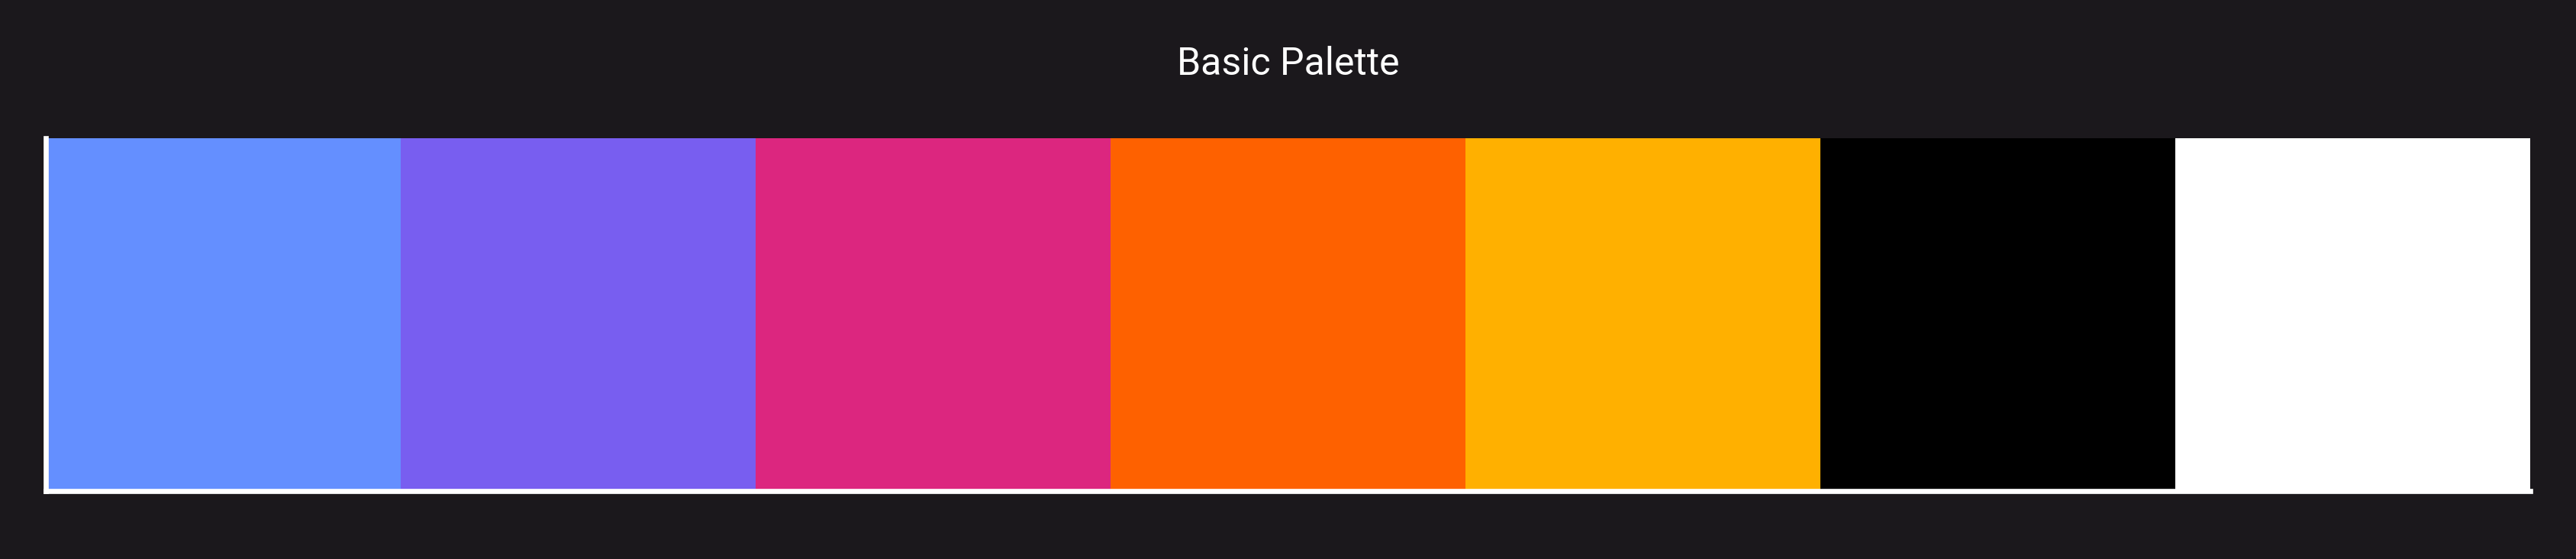

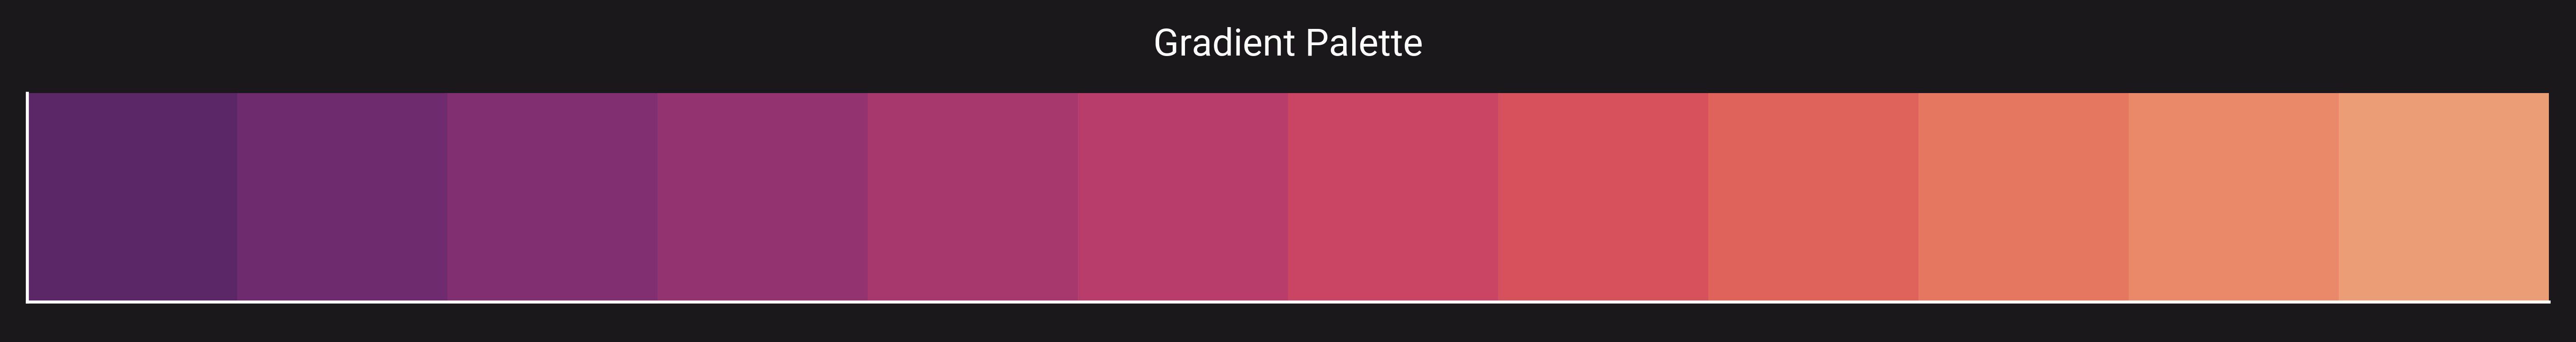

In [28]:
import geopandas as gpd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r',  12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)

# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

In [29]:

g = sns.catplot(data=processed_crop_df, x="Crop", y="Volume", hue="Quarter_And_Year", kind="bar",
                palette=colors[0:4], height=8, aspect=2)

g.ax.set(xlabel="Crop", ylabel="Volume")
g.ax.set_title('Crops produced in the Philippines in 2023, by volume of production(in thousand metric tons) ')
sns.move_legend(g, "upper right", bbox_to_anchor=(0.88, 0.98), ncol=3, title='Quarter\n')
plt.show()



In [33]:
# loading the crop data and processing it by dropping unneccessary columns and transposing
crop_df = pd.read_csv("out.csv")
crop_df = crop_df.drop(columns=['2021', '2022', '2023', '2021(Q1)', '2021(Q2)', '2021(Q3)', '2021(Q4)'])
crop_df = crop_df.iloc[0:10]

In [43]:
processed_crop_df = pd.DataFrame(columns=['Crop', 'Quarter_And_Year', 'Volume', 'Temperature', 'Barometric Pressure', 'Humidity'])
col = ['2022(Q1)', '2022(Q2)', '2022(Q3)', '2022(Q4)', '2023(Q1)', '2023(Q2)', '2023(Q3)', '2023(Q4)']
for index, row in crop_df.iterrows():
    for i, v in row.items():
        if i != 'Crop':
            processed_crop_df = processed_crop_df._append({'Crop': row['Crop'], 'Quarter_And_Year': i, 'Volume': float(v.replace(',', '')), 'Temperature': quarter_weather_df.iloc[col.index(i)]['temp'], 'Barometric Pressure': quarter_weather_df.iloc[col.index(i)]['baro'], 'Humidity': quarter_weather_df.iloc[col.index(i)]['hum']}, ignore_index=True)
processed_crop_df

C:\Users\Louis Miguel\AppData\Local\Temp\ipykernel_26128\2196144259.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  processed_crop_df = processed_crop_df._append({'Crop': row['Crop'], 'Quarter_And_Year': i, 'Volume': float(v.replace(',', '')), 'Temperature': quarter_weather_df.iloc[col.index(i)]['temp'], 'Barometric Pressure': quarter_weather_df.iloc[col.index(i)]['baro'], 'Humidity': quarter_weather_df.iloc[col.index(i)]['hum']}, ignore_index=True)


,Crop,Quarter_And_Year,Volume,Temperature,Barometric Pressure,Humidity
0,Palay,2022(Q1),4541.26,26.891667,969.452778,67.147222
1,Palay,2022(Q2),4202.42,24.559229,847.953168,62.071625
2,Palay,2022(Q3),3789.60,27.258152,958.722826,78.274457
3,Palay,2022(Q4),7223.12,26.633152,953.125000,73.839674
4,Palay,2023(Q1),4778.79,26.958217,992.431755,68.167131
...,...,...,...,...,...,...
75,SweetPotato,2022(Q4),141.31,26.633152,953.125000,73.839674
76,SweetPotato,2023(Q1),105.85,26.958217,992.431755,68.167131
77,SweetPotato,2023(Q2),151.65,29.906593,1007.689560,74.156593
78,SweetPotato,2023(Q3),131.07,28.869565,1003.970109,81.997283


In [54]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Temperature', y='Volume', data=processed_crop_df.iloc[8:16], hue='Quarter_And_Year', palette='coolwarm', s=100)
sns.regplot(x='Temperature', y='Volume', data=processed_crop_df.iloc[8:16], scatter=False, color='red')
plt.title('Correlation between Temperature and Crop Yield per Quarter')
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Yield')
sns.move_legend(g, "upper right", bbox_to_anchor=(0.88, 0.98), ncol=3, title='Quarter\n')
plt.legend(title='Quarter')
plt.show()